### Machine Learning For Titanic Survival
#### Prediction for Survival 
    - Defining Probelm Satement
    - Collecting Data
    - Exploratory data Analysis
    - Feature Engineering
    - Modelling
    - Testing 
    - Result Anaysis
    

### 1. Defining Probelm Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### 2. Collecting Data
Download traning & testing dataset from kaggle  https://www.kaggle.com/c/titanic/data

In [413]:
#import Dependdencies
%matplotlib inline

#python basic imports 
import math,time, random, datetime

#Data Manipulation libs
import pandas as pd
import numpy as np 

# visualiazation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.5)






### Loading Datasets(Trian, Test)

In [414]:
train =pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### 3. Data Anaysis

In [415]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Dictionary
Survived: 0 = No, 1 = Yes

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic

ticket: Ticket number

cabin: Cabin number

embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [416]:
#geting shape of train data
train.shape

(891, 12)

In [417]:
#geting inforamation of data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [418]:
#geting basic information of columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [419]:
#Finding Missing values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

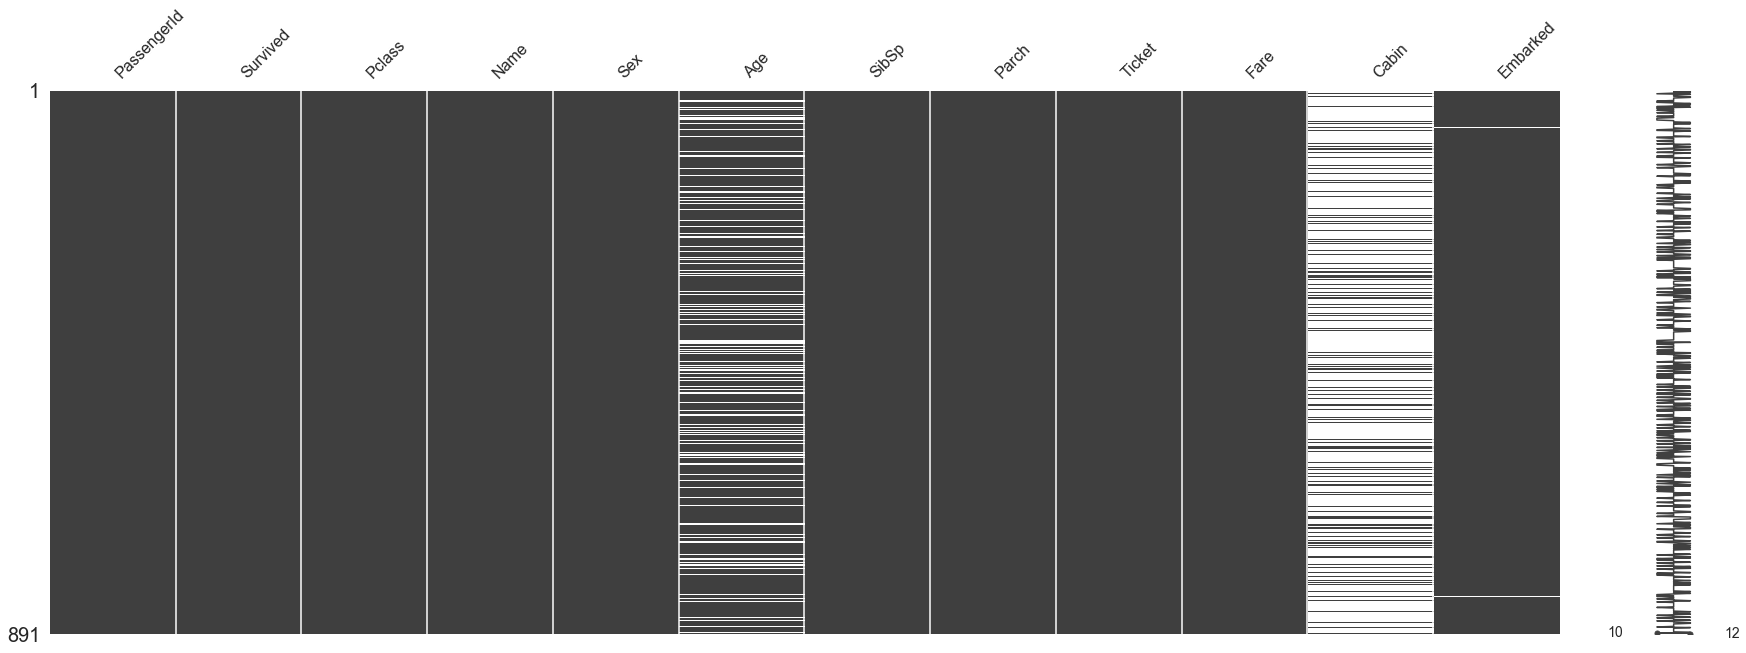

In [420]:
#ploting missing values

missingno.matrix(train,figsize=(30,10))
#sns.heatmap(train.isnull())

In [421]:
#finding catagorical data columns with catagories
train.select_dtypes(['object','float64','int64']).nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### 4 Exploring Each Feature indisually

0    549
1    342
Name: Survived, dtype: int64


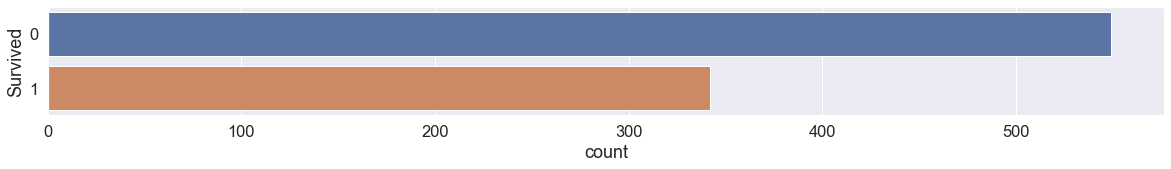

In [422]:
#people survived?
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [423]:
# 4.1 creating subset Dataframe
df_y=pd.DataFrame()
features_df=pd.DataFrame()
df_y['Survived']=train['Survived']

In [424]:
df_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


##### 4.2 Pclass
Ticket class of the passanger

key : 1=1st , 2 = 2nd, 3= 3rd

3    491
1    216
2    184
Name: Pclass, dtype: int64


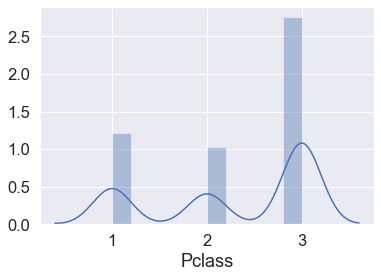

In [425]:
#ploting distributon and count value in pclass
sns.distplot(train.Pclass)
print(train['Pclass'].value_counts())

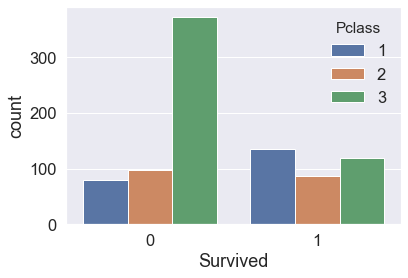

In [426]:
#geting survived based on pclass
sns.countplot(x='Survived',hue='Pclass',data=train)

Pclass clearly shows that 1 st class have survival than 2nd and 3rd class and 3rd class has very less servivals
##### Pcalss has catagorical and it is ordinal so need to keep it is 1,2,3

In [427]:
features_df['Pclass']=train['Pclass']


In [428]:
features_df.head()


,Pclass
0,3
1,1
2,3
3,1
4,3


#### 4.3 Name features 
In Name all values are unique we need to create features based on Mr,Miss, Mrs 

In [429]:
dataset=pd.DataFrame()
dataset['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [430]:
dataset['Title'].value_counts()
i=0
for data in dataset['Title']:
    if data =='Mr':
        i=i+1
        continue
        
    elif data=='Miss':
        i=i+1
        continue
    elif data =='Mrs':
        i=i+1
        continue
    else:
        dataset['Title'][i]='Other'
    i=i+1
dataset.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


Apply one hot encodeing on title column valaue on Mr,Miss,Mrs and all other value put on others column 

In [431]:
features_df=pd.concat([features_df,pd.get_dummies(dataset['Title'],prefix='Title')],axis=1)

In [432]:
features_df.head()

,Pclass,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,0,1,0,0
1,1,0,0,1,0
2,3,1,0,0,0
3,1,0,0,1,0
4,3,0,1,0,0


In [433]:
#removing Title_Other column to avoid dummy variable Trap

features_df=features_df.drop(columns=['Title_Other'])

In [434]:
features_df.head()

,Pclass,Title_Miss,Title_Mr,Title_Mrs
0,3,0,1,0
1,1,0,0,1
2,3,1,0,0
3,1,0,0,1
4,3,0,1,0


#### 4.4Sex Feature


In [435]:
#create label encoding for sex features and aslo one hot encodeing
#and delete one dummy column to avoid dummy variable traping
features_df=pd.concat([features_df,pd.get_dummies(train['Sex'],prefix='Sex',drop_first=True)],axis=1)


In [436]:
features_df.head()

,Pclass,Title_Miss,Title_Mr,Title_Mrs,Sex_male
0,3,0,1,0,1
1,1,0,0,1,0
2,3,1,0,0,0
3,1,0,0,1,0
4,3,0,1,0,1


Comaparing sex veriable with Survival 
beacuse thay both are binaries

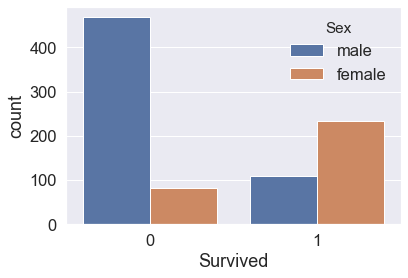

In [437]:
sns.countplot(x='Survived',hue='Sex',data=train)

females has more chance of survival  than male 

#### 4.5 Age

In Age there are lots of missing value that are 177 we need to handdle that

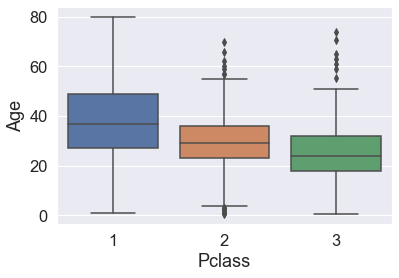

In [438]:
#for handlling missing value we can fill with pclass or title class
#first we check in graph which is better
#cheking with pclass
sns.boxplot(y='Age', x='Pclass', data=train)


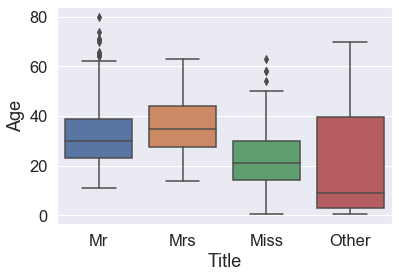

In [439]:
#ching with title feature
#creating dataframe
df_temp=pd.DataFrame()
df_temp=pd.concat([dataset['Title'],train['Age']],axis=1)
#df_temp.head()
sns.boxplot(y='Age',x='Title' , data=df_temp)

Filling age missing values with the median age for each title 

In [440]:
df_temp['Age'].fillna(df_temp.groupby('Title')['Age'].transform('median'),inplace=True)
#adding Age in to feature dataframe
features_df=pd.concat([features_df,df_temp['Age']],axis=1)


In [441]:
features_df.head()

,Pclass,Title_Miss,Title_Mr,Title_Mrs,Sex_male,Age
0,3,0,1,0,1,22.0
1,1,0,0,1,0,38.0
2,3,1,0,0,0,26.0
3,1,0,0,1,0,35.0
4,3,0,1,0,1,35.0


Comparing Age with Servival 

In [442]:
'''df_temp=pd.DataFrame()
df_temp['Age']=features_df['Age']
df_temp['Survived']=df_y['Survived']
df_temp.shape
facet=sns.FacetGrid(df_temp,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df_temp['Age'].max()))
facet.add_legend()
plt.show()
'''

"df_temp=pd.DataFrame()\ndf_temp['Age']=features_df['Age']\ndf_temp['Survived']=df_y['Survived']\ndf_temp.shape\nfacet=sns.FacetGrid(df_temp,hue='Survived',aspect=4)\nfacet.map(sns.kdeplot,'Age',shade=True)\nfacet.set(xlim=(0,df_temp['Age'].max()))\nfacet.add_legend()\nplt.show()\n"

### 4.6 Sibsp features

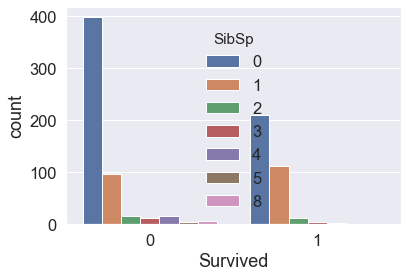

In [443]:
train.head(30)
#checking effict of sibsp in survired

#geting survived based on pclass
sns.countplot(x='Survived',hue='SibSp',data=train)

In [444]:
#adding column to dataframe
features_df['SibSp']=train['SibSp']
features_df.head()

,Pclass,Title_Miss,Title_Mr,Title_Mrs,Sex_male,Age,SibSp
0,3,0,1,0,1,22.0,1
1,1,0,0,1,0,38.0,1
2,3,1,0,0,0,26.0,0
3,1,0,0,1,0,35.0,1
4,3,0,1,0,1,35.0,0


#### 4.6  Parch

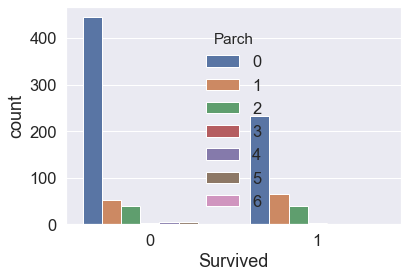

In [445]:
#geting survived based on PArch
sns.countplot(x='Survived',hue='Parch',data=train)

In [446]:
#adding PArch to dataframe
features_df['Parch']=train['Parch']
features_df.head()

,Pclass,Title_Miss,Title_Mr,Title_Mrs,Sex_male,Age,SibSp,Parch
0,3,0,1,0,1,22.0,1,0
1,1,0,0,1,0,38.0,1,0
2,3,1,0,0,0,26.0,0,0
3,1,0,0,1,0,35.0,1,0
4,3,0,1,0,1,35.0,0,0


#### 4.7 Titkets

In [447]:
train.Ticket.value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
347069      1
315151      1
C 17369     1
27267       1
113800      1
Name: Ticket, Length: 681, dtype: int64

Not adding Tickets to features because not find any pattern

#### 4.8 Fare

In [448]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [449]:
#adding Fare into features
features_df['Fare']=train['Fare']
features_df.head()

,Pclass,Title_Miss,Title_Mr,Title_Mrs,Sex_male,Age,SibSp,Parch,Fare
0,3,0,1,0,1,22.0,1,0,7.2500
1,1,0,0,1,0,38.0,1,0,71.2833
2,3,1,0,0,0,26.0,0,0,7.9250
3,1,0,0,1,0,35.0,1,0,53.1000
4,3,0,1,0,1,35.0,0,0,8.0500


#### 4.9 Cabin

In [450]:
#in cabin lots of missing values are there so not added into 
#feature Df

### 4.10 Embarked

In [451]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

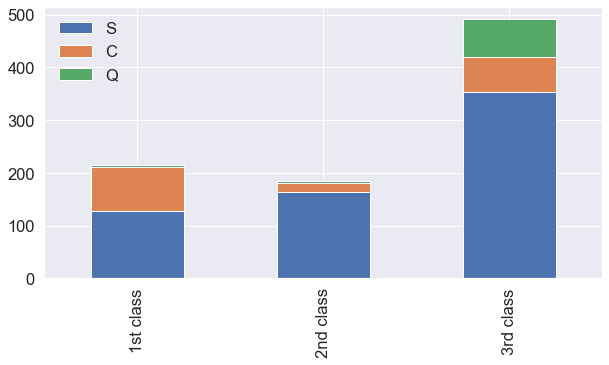

In [452]:
# filling missing values Embarked
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark

more than 50% of 2nd class are from S embark

more than 50% of 3rd class are from S embark

fill out missing value embark. with s embark

In [453]:
train.Embarked.isnull().sum()

2

In [454]:
train.loc[train['Embarked'].isnull(),'Embarked']='S'

In [455]:
train.Embarked.isnull().sum()

0

In [456]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

##### Embarked is an catagoriacal features and that is nomianl so we need to perfrom one hot encodeing on that

In [457]:
#perfrom one hot encoding and added to features
features_df=pd.concat([features_df,pd.get_dummies(train['Embarked'],prefix='Embarked',drop_first=True)],axis=1)
features_df.head()

,Pclass,Title_Miss,Title_Mr,Title_Mrs,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,1,0,1,22.0,1,0,7.2500,0,1
1,1,0,0,1,0,38.0,1,0,71.2833,0,0
2,3,1,0,0,0,26.0,0,0,7.9250,0,1
3,1,0,0,1,0,35.0,1,0,53.1000,0,1
4,3,0,1,0,1,35.0,0,0,8.0500,0,1


## Modeling

In [559]:
#importing classifiers modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [560]:
#Creating features matrix and dependent variable y
train_data=pd.DataFrame()
train_data=features_df.copy()
target=df_y

In [561]:
train_data.shape, target.shape

((891, 11), (891, 1))

In [562]:
train_data.drop(['Age'], axis=1, inplace=True)

In [563]:
train_data.shape, target.shape

((891, 10), (891, 1))

#### Cross Validatin

In [564]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

#### Naive Bayes 

In [565]:
import warnings
warnings.simplefilter('ignore')
nb=GaussianNB()
score=cross_val_score(nb,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score)*100,2))


78.68


#### KNN

In [566]:
knn=KNeighborsClassifier(n_neighbors=11)


In [567]:
score=cross_val_score(knn,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score)*100,2))


77.56


#### Decision Tree

In [568]:
clf = DecisionTreeClassifier()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score)*100,2))


81.6


#### Random Forest

In [571]:
clf = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score)*100,2))
print(score.mean()*100)

83.05
83.05118601747816


#### SVM

In [570]:
clf = SVC()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score)*100,2))

79.01
